# Atividade 2

- nome: Jessé Pires Barbato Rocha
- RA: 2149389

A atividade consiste na criação de um classificador binário por limiar para a base de dados iris_2class.csv, fornecida pelo professor. Abaixo, encontra-se a solução desenvolvida.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

# Análise dos dados

Nesta etapa, nosso objetivo é encontrar um atributo que separe bem os registros.

In [2]:
df = pd.read_csv("iris_2class.csv")
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica


## Estatísticas descritivas

As estatísticas descritivas nos ajudam a ter uma ideia (melhor do que apenas a exibição dos da base de dados acima), do comportamento dos nossos dados, como estão distribuídos, etc.

In [3]:
df.groupby("especie").describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
especie                                                                    
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
especie                             ...                          
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
especie                                                                
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

## Histograma

Abaixo é apresentado um histograma para cada atributo da base de dados, com os valores separados pela espécia da flor.

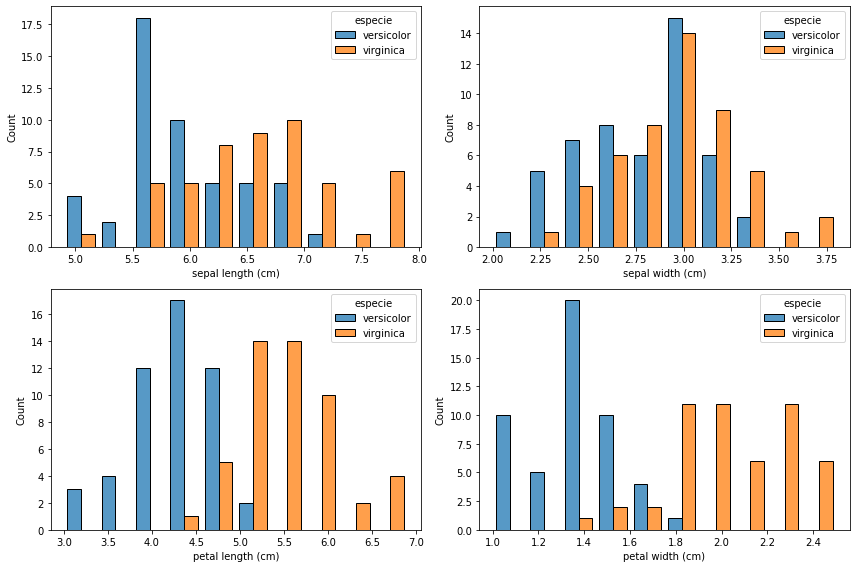

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0][0])
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0][1])
sns.histplot(data=df, bins=10, x='petal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[1][0])
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[1][1])
plt.tight_layout()
plt.show()

<br/>

**Perceba** que, dos quatro atributos apresentados acima, os dois que melhor separam os dados são o comprimento e a largura da pétala. Portanto, esses dois foram os selecionados. Como precisamos de apenas um atributo para usar como separador, vamos realizar mais uma análise por meio de um *scatter plot*.

## scatterplot com petal legnth e petal width

Neste caso, *petal length* foi plotado no eixo X e petal width, no eixo Y.

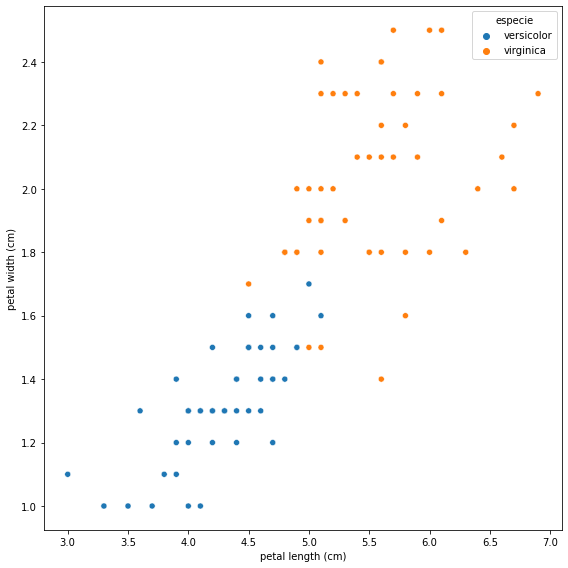

In [5]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.tight_layout()
plt.show()

<br/>

**Perceba** também que, por mais que eles separem bem os dados, não se tem 100% de separação. Tentemos traçar uma linha para ver qual atributo se comporta melhor como separador.

## Traçando linha considerando *petal width* como separador

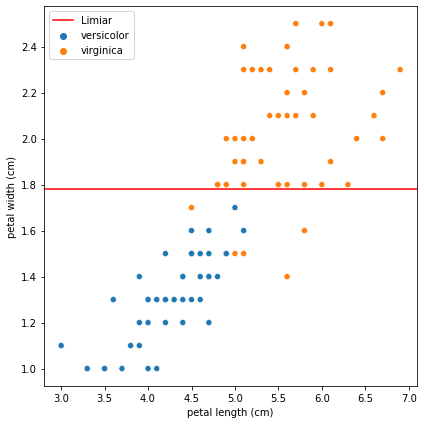

In [6]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.axhline(1.78, color='red', label='Limiar')
plt.legend()
plt.tight_layout()
plt.show()

<br/>

**Façamos** agora a linha usando o comprimento da pétala como separador.

## Traçando linha considerando *petal length* como separador

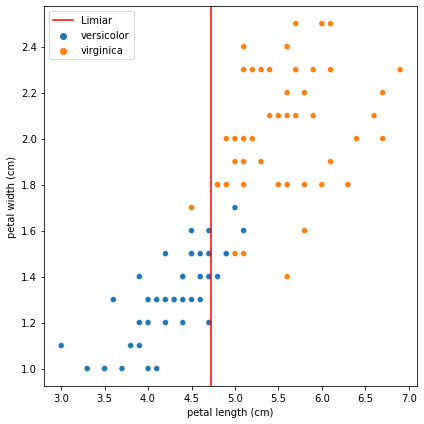

In [7]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.axvline(4.73, color='red', label='Limiar')
plt.legend()
plt.tight_layout()
plt.show()

<br/>

**As** opções da posição das linhas não são necessariamente as melhores, mas já nos dão uma boa base. Nos exemplos dados, a utilização de um ou outro traria, aparentemente, bons resultados. Porém, ao usar a largura da pétala como separador, parece haver muito menos "empates" que ao se utilizar o comprimento da pétala. **Portanto, utilizaremos a largura da pétala como separador.**

# Implementação do classificador binário por limiar

Este classificador foi criado de maneira que pode ser utilizado com outro atributo além da *petal width*. Seu funcionamento é bastante simples. Ele recebe o valor escolhido para o limiar, o atributo que será o separador, os dados e os rótulos (que não precisam ser informados). Ele analisa dado por dado verificando se é de uma espécie ou outra com base no separador e adiciona a resposta à uma lista. Por fim esta lista é transformada em um *Data Frame* e retornada.

In [8]:
def classificador_limiar(limiar, atributo, dados, rotulos=('versicolor', 'virginica')):
    resposta = []
    for idx, dado in dados.iterrows():
        if dado[atributo] <= limiar:
            resposta.append(rotulos[0])
        else:
            resposta.append(rotulos[1])
    return pd.DataFrame(resposta, columns=['especie'])

# Implementação da busca exaustiva

Implementado o classificador, vamos agora implementar a busca exaustiva. Ela é utilizada para encontrar, dentre os possíveis limiares, o melhor limiar para um dado conjunto. Ela recebe a quantidade de limiares que deverão ser testados, o atributo separador, os atributos de entrada e os atributos de saída da base de dados (neste caso, a partição criada para o treino). Todos os limiares são testados com base no cálculo da acurácia. O limiar que produzir a maior acurácia será retornado.

In [9]:
def busca_exaustiva(n_limiares, atributo, x_treino, y_treino):
    v_min = x_treino[atributo].min()
    v_max = x_treino[atributo].max()
    
    limiares = np.linspace(v_min, v_max, n_limiares)
    melhor_limiar = None
    melhor_acuracia = 0
    
    for limiar in limiares:
        predicoes = classificador_limiar(limiar, atributo, x_treino)
        acuracia = accuracy_score(y_treino, predicoes['especie'])
        
        if acuracia > melhor_acuracia:
            melhor_acuracia = acuracia
            melhor_limiar = limiar
            
    return melhor_limiar

# Particionando os dados em conjunto de treino e teste.

Vamos agora particionar os dados em um conjunto de treino e outro de teste. Isto serve para testar a generalização do classificar, treinando o mesmo com um conjunto de dados e o testando com outro que ele ainda não tinha visto. A partição será feita em 80% para treino e 20% para teste.

Como visto em aula, não é uma boa prática utilizar apenas uma partição dos dados de treino e teste para calcular a acurácia do classificador. Para auxiliar, o particionamento feito pela biblioteca sklearn, gera partições aleatórias (ainda que mantendo a proporção graças ao *stratify*). Veja um exemplo de quatro partições exibidas, geradas pelo `train_test_split()`, mostrado abaixo em formato de *scater plot*.

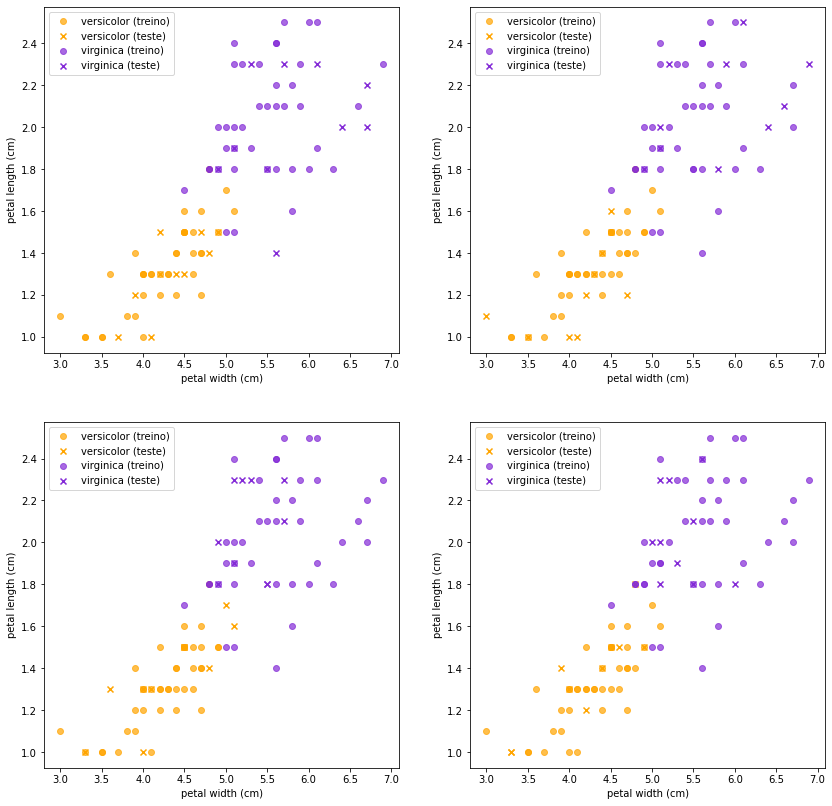

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

for col in range(2):
    for row in range(2):
        x_treino, x_teste, y_treino, y_teste = train_test_split(
            df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], 
            df['especie'], 
            test_size=0.2,
            stratify=df['especie'].tolist(),
            shuffle=True,
        )
        
        x_treino_versicolor = x_treino.loc[y_treino[y_treino == 'versicolor'].index]
        x_teste_versicolor = x_teste.loc[y_teste[y_teste == 'versicolor'].index]
        
        x_treino_virginica = x_treino.loc[y_treino[y_treino == 'virginica'].index]
        x_teste_virginica = x_teste.loc[y_teste[y_teste == 'virginica'].index]
        
        # dados de treino da versicolor
        axes[row][col].scatter(
            x=x_treino_versicolor['petal length (cm)'].values,
            y=x_treino_versicolor['petal width (cm)'].values,
            label='versicolor (treino)',
            c='orange',
            alpha=0.7
        )
        
        # dados de teste da versicolor
        axes[row][col].scatter(
            x=x_teste_versicolor['petal length (cm)'].values,
            y=x_teste_versicolor['petal width (cm)'].values,
            label='versicolor (teste)',
            c='orange',
            marker='x'
        )
        
        # dados de treino da virginica
        axes[row][col].scatter(
            x=x_treino_virginica['petal length (cm)'].values,
            y=x_treino_virginica['petal width (cm)'].values,
            label='virginica (treino)',
            c='#842bd7',
            alpha=0.7
        )
        
        # dados de teste da virginica
        axes[row][col].scatter(
            x=x_teste_virginica['petal length (cm)'].values,
            y=x_teste_virginica['petal width (cm)'].values,
            label='virginica (teste)',
            c='#842bd7',
            marker='x'
        )
        
        axes[row][col].legend()
        axes[row][col].set_ylabel('petal length (cm)')
        axes[row][col].set_xlabel('petal width (cm)')

# Testando acurácia do classificador

Sabendo disto, vamos aproveitar tal propriedade do particionamento, criando 20 partições diferentes, visando trazer mais confiança para o nosso classificador. Vamos então calcular, para cada partição, o melhor limiar, testando 100 limiares por partição, **utilizando o conjunto de treino**. Feito isso, vamos então obter as predições do classificador limiar, **utilizando os atributos de entrada do conjunto de teste**. Por fim, vamos calcular a acurácia do limiar e adicioná-la a uma lista de acurácias, **utilizando os atributos de saída do conjunto de teste**. Serão exibidas, dessas acurácias, a menor, a maior, a acurácia média e o desvio padrão. Veja o código implementado abaixo.

In [11]:
acuracias = []

for i in range(20):
    x_treino, x_teste, y_treino, y_teste = train_test_split(
        df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], 
        df['especie'], 
        test_size=0.2,
        stratify=df['especie'].tolist(),
        shuffle=True,
    )
    
    limiar = busca_exaustiva(100, 'petal width (cm)', x_treino, y_treino)
    predicoes = classificador_limiar(limiar, 'petal width (cm)', x_teste)
    acuracia = accuracy_score(y_teste, predicoes['especie'])
    
    acuracias.append(acuracia)

In [12]:
print("Acurácia mínima: %.3f" % min(acuracias))
print("Acurácia máxima: %.3f" % max(acuracias))
print("Acurácia média: %.3f" % np.mean(acuracias))
print("Desvio padrão: %.3f" % np.std(acuracias))

Acurácia mínima: 0.800
Acurácia máxima: 1.000
Acurácia média: 0.922
Desvio padrão: 0.054


<br/>

**Perceba** que o resultado foi muito bom com *petal width* como o atributo separador para o classificar binário por limiar.